# Conceptos básicos de estadística para la modelización predictiva

## Contraste de Hipótesis
* Definir *hipótesis nula* ($\mu_0$) y *alternativa uni o bilateral*
* Tomar una muestra aleatoria de tamaño ***n*** y calcular el valor del estimador (promedio, proporción, ...)
* Calcular el estadístico de contraste *z-valor* o *t-valor*
* Calcular el *p-valor* asociado
* Comparar p-valor y nivel de significación y decidir

## Test de la Chi-Cuadrado
Chi-Cuadrado ($X^2$) es el nombre de una prueba de hipótesis que determina si dos variables están relacionadas o no.

**Pasos:**
1. Realizar una conjetura
2. Escribir la hipótesis nula y la alternativa
3. Calcular el valor de $X^2 calc$
4. Determinar el valor de *p* y el grado de libertad
5. Obtener el valor crítico
6. Realizar una comparación entre el chi-cuadrado calculado y el valor crítico.
7. Interpretar la comparación

Bondad de ajuste: $ n_c - 1 $ siendo $ c = categorias $

Grado de libertad: $ df = (n _f - 1)(n _c - 1) $  siendo $ f = filas $ y $ c = columnas $

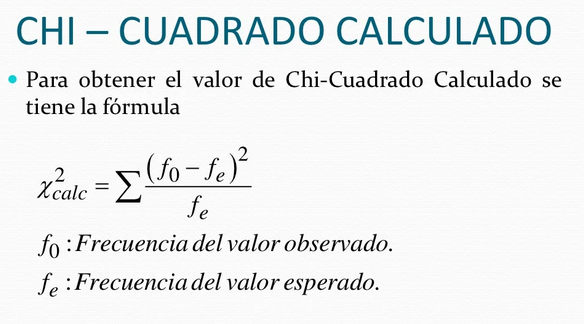

In [1]:
from IPython.display import Image
Image(filename='../python-ml-course-master/notebooks/resources/Prueba Chi-Cuadrado.png')

## Corrleación
La correlación es un tipo de asociación entre dos variables numéricas, específicamente evalúa la tendencia (creciente o decreciente) en los datos. $ y = f(x) $

### Correlación lineal
$ y = ax + b $

### Correlación exponencial
$ y = e^x + b $

### Coeficiente de Correlación de Pearson

El coeficiente de correlación de Pearson es una prueba que mide la relación estadística entre dos variables aleatorias continuas. Si la asociación entre los elementos no es lineal, entonces el coeficiente no se encuentra representado adecuadamente. El coeficiente de correlación oscila entre -1 y 1.
* Correlación negativa si $x < 0$
* Correlación positiva si $x > 0$
* Relación lineal si $x = 0$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# x: "Gastos diarios en un determinado periodo" (millones)
data_ads = pd.read_csv('../python-ml-course-master/datasets/ads/Advertising.csv')

In [3]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data_ads.shape

(200, 4)

In [5]:
# Formula de Coeficiente de correlación de Pearson
# Queremos saber si existe correlación entre las ventas y TV

# Calculamos el denominador
data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"])) * (data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [6]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [7]:
# Calculamos correlación sólo de TV
data_ads["corrTV"] = (data_ads["TV"] - np.mean(data_ads["TV"]))**2

In [8]:
# Calculamos correlación sólo de Ventas
data_ads["corrSa"] = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2

In [9]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corrTV,corrSa
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [11]:
# Calculamos correlación entre las ventas y TV
corr_pearson = sum(data_ads["corrn"]) / np.sqrt(sum(data_ads["corrTV"]) * sum(data_ads["corrSa"]))

In [12]:
corr_pearson

0.782224424861606

El valor de la correlación da positivo y de orden creciente, significa que cuanto más se gasta en publicidad de TV también incrementa las ventas.

#### Función de calculo de correlación

In [15]:
# Función para calcular la correlación (los mismo pasos anteriores)
def corr_coef(df, var1, var2):
    df["corrn"] = (df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2]))
    df["corrTV"] = (df[var1] - np.mean(df[var1]))**2
    df["corrSa"] = (df[var2] - np.mean(df[var2]))**2
    corr_p = sum(df["corrn"]) / np.sqrt(sum(df["corrTV"]) * sum(df["corrSa"]))
    return corr_p

In [16]:
corr_coef(data_ads, "TV", "Sales")

0.782224424861606

In [17]:
# Calculos de correlacion utilizando la función creada
data_ads = pd.read_csv('../python-ml-course-master/datasets/ads/Advertising.csv')

In [18]:
cols = data_ads.columns.values
cols

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [19]:
for x in cols:
    for y in cols:
        print(x + ", " + y + " : " + str(corr_coef(data_ads, x, y)))

TV, TV : 1.0
TV, Radio : 0.05480866446583009
TV, Newspaper : 0.056647874965056993
TV, Sales : 0.782224424861606
Radio, TV : 0.05480866446583009
Radio, Radio : 1.0
Radio, Newspaper : 0.3541037507611752
Radio, Sales : 0.5762225745710553
Newspaper, TV : 0.056647874965056993
Newspaper, Radio : 0.3541037507611752
Newspaper, Newspaper : 1.0
Newspaper, Sales : 0.22829902637616525
Sales, TV : 0.782224424861606
Sales, Radio : 0.5762225745710553
Sales, Newspaper : 0.22829902637616525
Sales, Sales : 1.0


Text(0.5, 1.0, 'Gastos en publicidad en TV vs Ventas del producto')

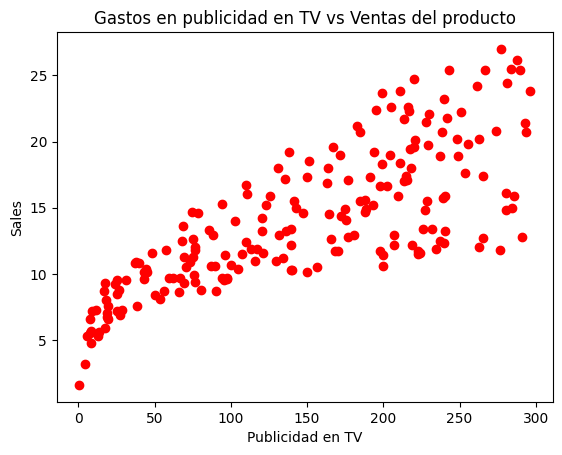

In [21]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
plt.xlabel("Publicidad en TV")
plt.ylabel("Ventas")
plt.title("Gastos en publicidad en TV vs Ventas del producto")

Text(0.5, 1.0, 'Gastos de publicidad en Radio vs Ventas del producto')

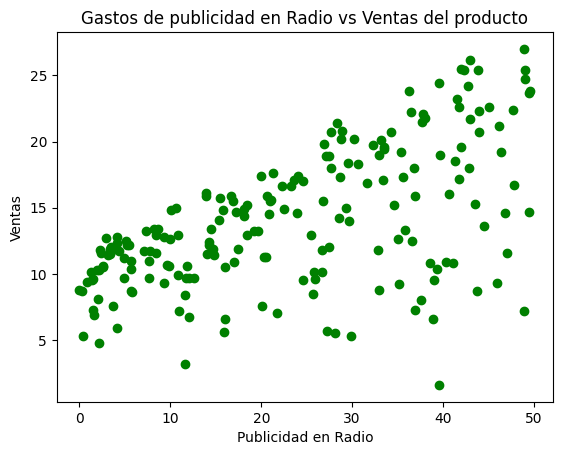

In [22]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "go")
plt.xlabel("Publicidad en Radio")
plt.ylabel("Ventas")
plt.title("Gastos de publicidad en Radio vs Ventas del producto")

Text(0.5, 1.0, 'Gastos de publicidad en Diarios vs Ventas del producto')

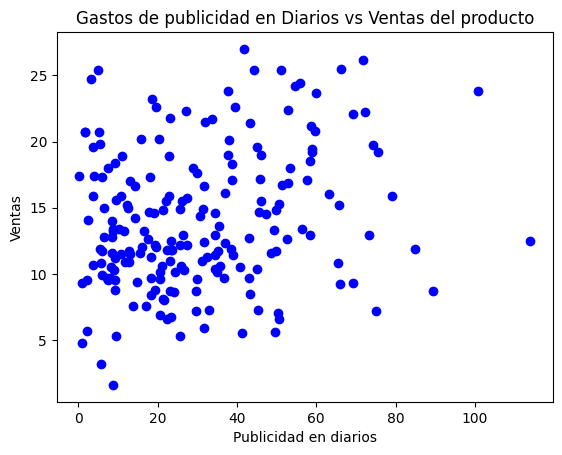

In [23]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "bo")
plt.xlabel("Publicidad en diarios")
plt.ylabel("Ventas")
plt.title("Gastos de publicidad en Diarios vs Ventas del producto")

#### Función de correlación en Python

In [24]:
data_ads = pd.read_csv('../python-ml-course-master/datasets/ads/Advertising.csv')
# Matriz de correlacion calculada con la funcion definida
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


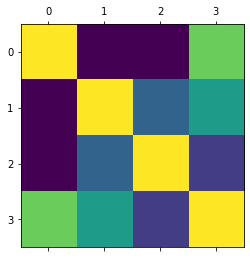

In [62]:
plt.matshow(data_ads.corr())

Amarillo y verde: correlaciones positivas

Violeta y azul: correlaciones bajas o casi nulas